In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

Models Implemented
1. LSTM
2. Support Vector Machine(SVM)
3. Extreme Learning Method(ELM)
4. Decision Tree(DT)
5. PCA-Adaboost-SVM
6. XGBoost
7. CatBoost
8. Random Forest

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fetal_health.csv to fetal_health.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['fetal_health.csv']))
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# **Deep Learning - LSTM**

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Assuming 'fetal_health' is the name of your target variable
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Convert target variable to categorical (one-hot encoding)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(3, activation='softmax'))  # Three units for three classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Make predictions
y_pred_proba = model.predict(X_test_reshaped)
y_pred = [round(x.argmax()) for x in y_pred_proba]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test.argmax(axis=1), y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test.argmax(axis=1), y_pred))
print("Classification Report:\n", classification_report(y_test.argmax(axis=1), y_pred))


Epoch 1/10
54/54 [==============================] - 3s 16ms/step - loss: 0.9538 - accuracy: 0.6735 - val_loss: 0.7939 - val_accuracy: 0.8122
Epoch 2/10
54/54 [==============================] - 0s 6ms/step - loss: 0.6469 - accuracy: 0.8524 - val_loss: 0.5425 - val_accuracy: 0.8615
Epoch 3/10
54/54 [==============================] - 0s 5ms/step - loss: 0.4444 - accuracy: 0.8776 - val_loss: 0.4186 - val_accuracy: 0.8662
Epoch 4/10
54/54 [==============================] - 0s 5ms/step - loss: 0.3525 - accuracy: 0.8824 - val_loss: 0.3597 - val_accuracy: 0.8685
Epoch 5/10
54/54 [==============================] - 0s 4ms/step - loss: 0.3080 - accuracy: 0.8847 - val_loss: 0.3310 - val_accuracy: 0.8803
Epoch 6/10
54/54 [==============================] - 0s 6ms/step - loss: 0.2799 - accuracy: 0.8929 - val_loss: 0.3079 - val_accuracy: 0.8873
Epoch 7/10
54/54 [==============================] - 0s 5ms/step - loss: 0.2620 - accuracy: 0.8994 - val_loss: 0.2924 - val_accuracy: 0.8944
Epoch 8/10
54/54 [=

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (SVMs are sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust kernel, C, and gamma parameters

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the SVM classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.903755868544601
Confusion Matrix:
 [[317  15   1]
 [ 17  46   1]
 [  2   5  22]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       333
         2.0       0.70      0.72      0.71        64
         3.0       0.92      0.76      0.83        29

    accuracy                           0.90       426
   macro avg       0.85      0.81      0.83       426
weighted avg       0.90      0.90      0.90       426



# **Extreme Learning Method**

In [ ]:
!pip install hpelm

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from hpelm import ELM
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# One-hot encode the target variable
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_onehot = onehot_encoder.fit_transform(integer_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an ELM classifier
elm_classifier = ELM(X_train_scaled.shape[1], y_onehot.shape[1])

# Train the ELM classifier
elm_classifier.add_neurons(100, 'sigm')  # You can adjust the number of neurons and the activation function
elm_classifier.train(X_train_scaled, y_train, 'c')

# Make predictions
y_pred = elm_classifier.predict(X_test_scaled)

# Convert one-hot encoded predictions back to labels
y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))
y_test_labels = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

# Evaluate the ELM classifier
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.8708920187793427
Confusion Matrix:
 [[318  10   5]
 [ 26  33   5]
 [  2   7  20]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.92      0.95      0.94       333
         2.0       0.66      0.52      0.58        64
         3.0       0.67      0.69      0.68        29

    accuracy                           0.87       426
   macro avg       0.75      0.72      0.73       426
weighted avg       0.86      0.87      0.87       426



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the Decision Tree classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9225352112676056
Confusion Matrix:
 [[314  17   2]
 [ 12  52   0]
 [  2   0  27]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       333
         2.0       0.75      0.81      0.78        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.92       426
   macro avg       0.88      0.90      0.89       426
weighted avg       0.92      0.92      0.92       426



# **PCA-Adaboost-SVM**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with PCA, AdaBoost, and SVM
pipeline = Pipeline([
    ('pca', PCA(n_components=10)),  # Adjust the number of components as needed
    ('adaboost', AdaBoostClassifier(base_estimator=SVC(probability=True, kernel='linear'), n_estimators=50, random_state=42)),
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the pipeline
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7816901408450704
Confusion Matrix:
 [[333   0   0]
 [ 64   0   0]
 [ 29   0   0]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.78      1.00      0.88       333
         2.0       0.00      0.00      0.00        64
         3.0       0.00      0.00      0.00        29

    accuracy                           0.78       426
   macro avg       0.26      0.33      0.29       426
weighted avg       0.61      0.78      0.69       426



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **XGBoost**

In [ ]:
from xgboost import XGBClassifier

X = df.drop('fetal_health', axis=1)  # Features
y = df['fetal_health'] - 1  # Convert labels to start from 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)

# Train the classifier
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the XGBoost model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.960093896713615
Confusion Matrix:
 [[325   7   1]
 [  8  55   1]
 [  0   0  29]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       333
         1.0       0.89      0.86      0.87        64
         2.0       0.94      1.00      0.97        29

    accuracy                           0.96       426
   macro avg       0.93      0.95      0.94       426
weighted avg       0.96      0.96      0.96       426



# **CatBoost**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

X = df.drop('fetal_health', axis=1)  # Adjust the column name accordingly
y = df['fetal_health']  # Adjust the column name accordingly

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='MultiClass', verbose=100)

# Train the model
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Make predictions
y_pred = catboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

0:	learn: 1.0332715	test: 1.0336863	best: 1.0336863 (0)	total: 118ms	remaining: 59s
100:	learn: 0.1457046	test: 0.1922530	best: 0.1922530 (100)	total: 9.74s	remaining: 38.5s
200:	learn: 0.0816367	test: 0.1534137	best: 0.1534137 (200)	total: 22.6s	remaining: 33.6s
300:	learn: 0.0546373	test: 0.1408951	best: 0.1408951 (300)	total: 37.8s	remaining: 25s
400:	learn: 0.0396127	test: 0.1359356	best: 0.1359356 (400)	total: 51.3s	remaining: 12.7s
499:	learn: 0.0306646	test: 0.1323993	best: 0.1323937 (498)	total: 1m 6s	remaining: 0us

bestTest = 0.1323936926
bestIteration = 498

Shrink model to first 499 iterations.
Accuracy: 0.9530516431924883
Confusion Matrix:
[[328   4   1]
 [ 12  51   1]
 [  1   1  27]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.91      0.80      0.85        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.95       42

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('fetal_health', axis=1)  # Adjust the column name accordingly
y = df['fetal_health']  # Adjust the column name accordingly

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9460093896713615
Confusion Matrix:
[[327   5   1]
 [ 13  49   2]
 [  1   1  27]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.89      0.77      0.82        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.92      0.89      0.90       426
weighted avg       0.94      0.95      0.94       426



In [ ]:
# Table and Graph showing Accuracies
import matplotlib.pyplot as plt

# Replace these lists with your models and their accuracies
models = ['LSTM', 'SVM', 'ELM', 'DT', 'Adaboost', 'XGBoost', 'CatBoost', 'Random Forest']

accuracies = [0.896, 0.903, 0.870, 0.922, 0.781, 0.960, 0.953, 0.946]
# Create a DataFrame
data = {'Model': models, 'Accuracy': accuracies}
df = pd.DataFrame(data)

# Display the table
print("Model Accuracies:")
print(df)


Model Accuracies:
           Model  Accuracy
0           LSTM     0.896
1            SVM     0.903
2            ELM     0.870
3             DT     0.922
4       Adaboost     0.781
5        XGBoost     0.960
6       CatBoost     0.953
7  Random Forest     0.946


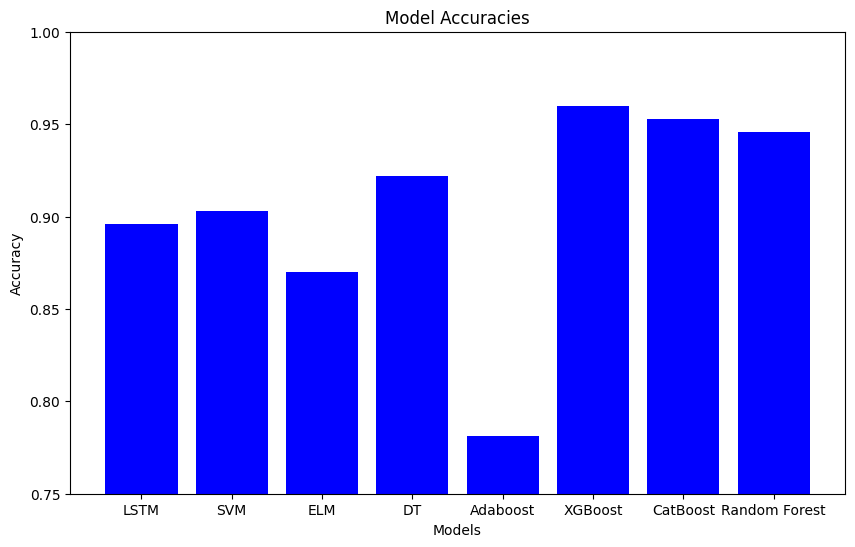

In [ ]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Accuracy'], color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0.75, 1)
plt.show()

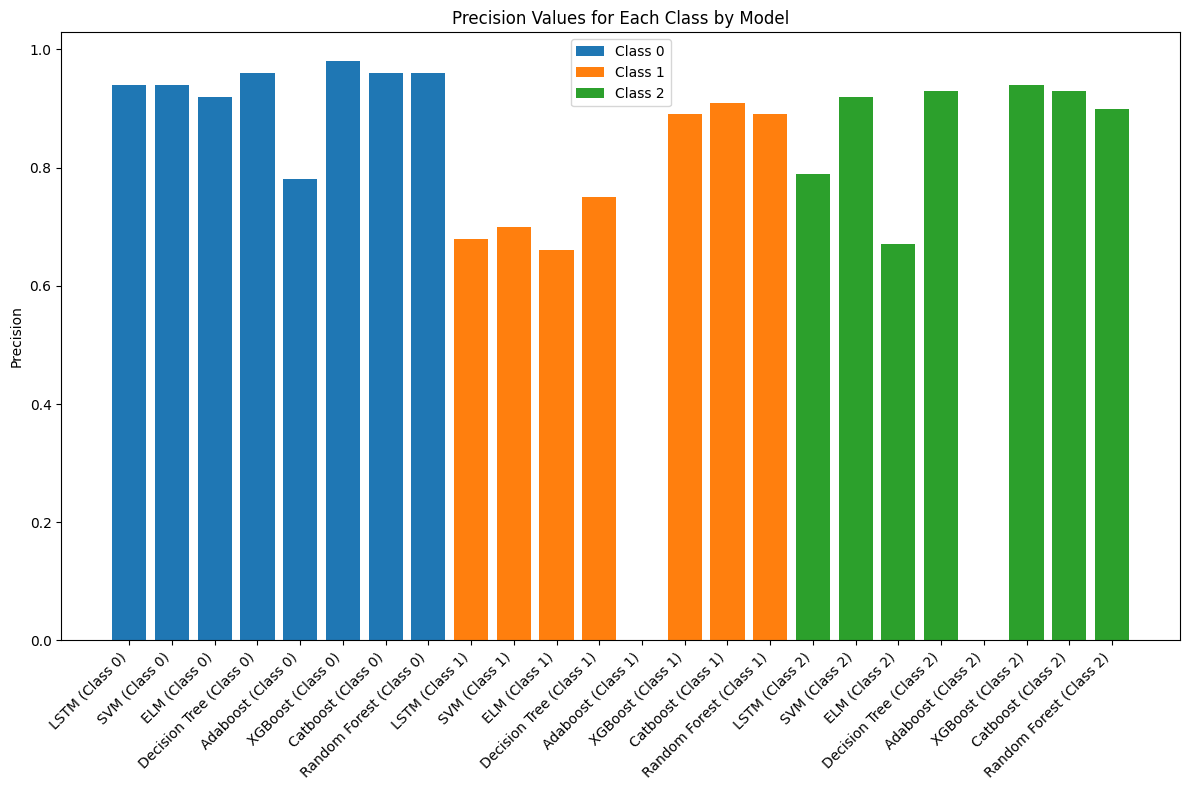

In [ ]:
# Precision Table and Graph
# Class 0,1,2 because we have 3 classes in target column
import matplotlib.pyplot as plt
import pandas as pd


models = ['LSTM', 'SVM', 'ELM', 'Decision Tree', 'Adaboost', 'XGBoost', 'Catboost', 'Random Forest']


precision_values = {
    'Model': models,
    'Class 0': [0.94, 0.94, 0.92, 0.96, 0.78, 0.98, 0.96, 0.96],  # Replace with actual precision values
    'Class 1': [0.68, 0.70, 0.66, 0.75, 0.00, 0.89, 0.91, 0.89],
    'Class 2': [0.79, 0.92, 0.67, 0.93, 0.00, 0.94, 0.93, 0.90],
}

precision_df = pd.DataFrame(precision_values)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each class and plot the precision values
for i in range(1, len(precision_df.columns)):
    ax.bar(precision_df['Model'] + f' (Class {i-1})', precision_df.iloc[:, i], label=f'Class {i-1}')

ax.set_ylabel('Precision')
ax.set_title('Precision Values for Each Class by Model')
ax.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()